In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn joblib

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.9 MB 7.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.4/8.9 MB 5.8 MB/s eta 0:00:02
   ----------------- ---------------------- 3.9/8.9 MB 5.7 MB/s eta 0:00:01
   --------------------- ------------------ 4.7/8.9 MB 5.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.8/8.9 MB 5.2 MB/s eta 0:00:01
   ------------------------------ --------- 6.8/8.9 MB 5.4 MB/s eta 0:00:01
   ----------------------------------- ---- 7.9/8.9 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 5.1 MB/s  0:00:01

   -------- ------------------------------- 1/5 [scikit-learn]
   -------- ------------------------------- 1/5 [scikit-learn]
   -------- ------------------------------- 1/5 [scikit-learn]
   -------- ------------------------------- 1/5 [scikit-learn]
   -------- ------------------------------- 1/5 [scikit-learn]
   -------

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
import joblib


In [8]:
# Load the cleaned dataset
df = pd.read_csv("../dataset/urls.csv")

# Basic inspection
df.head()

,url_length,valid_url,at_symbol,sensitive_words_count,path_length,isHttps,nb_dots,nb_hyphens,nb_and,nb_or,nb_www,nb_com,nb_underscore,target
0,42,0,0,0,20,0,2,0,0,0,1,1,0,0
1,73,0,0,0,52,0,5,0,0,0,0,1,0,0
2,73,0,0,0,52,0,5,0,0,0,0,1,0,0
3,73,0,0,0,52,0,5,1,0,1,0,1,0,0
4,73,0,0,0,52,0,5,0,0,0,0,1,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   url_length             2488 non-null   int64
 1   valid_url              2488 non-null   int64
 2   at_symbol              2488 non-null   int64
 3   sensitive_words_count  2488 non-null   int64
 4   path_length            2488 non-null   int64
 5   isHttps                2488 non-null   int64
 6   nb_dots                2488 non-null   int64
 7   nb_hyphens             2488 non-null   int64
 8   nb_and                 2488 non-null   int64
 9   nb_or                  2488 non-null   int64
 10  nb_www                 2488 non-null   int64
 11  nb_com                 2488 non-null   int64
 12  nb_underscore          2488 non-null   int64
 13  target                 2488 non-null   int64
dtypes: int64(14)
memory usage: 272.2 KB


In [10]:
X = df.drop("target", axis=1)
y = df["target"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (2488, 13)
Target shape: (2488,)


target
0    1313
1    1175
Name: count, dtype: int64


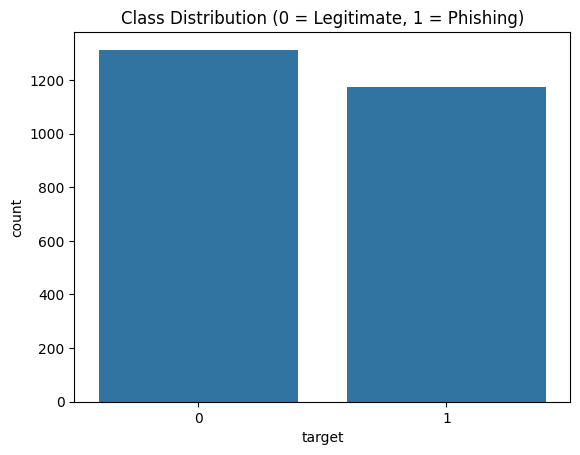

In [11]:
print(y.value_counts())

sns.countplot(x=y)
plt.title("Class Distribution (0 = Legitimate, 1 = Phishing)")
plt.show()


After SMOTE:
target
0    1313
1    1313
Name: count, dtype: int64


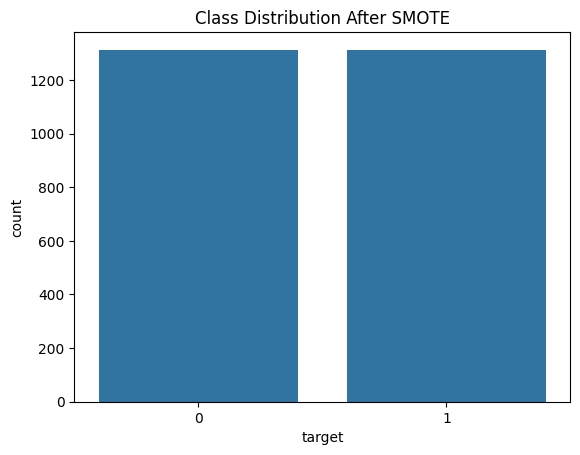

In [13]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:")
print(y_resampled.value_counts())

sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (2100, 13) (2100,)
Testing set: (526, 13) (526,)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head()

,url_length,valid_url,at_symbol,sensitive_words_count,path_length,isHttps,nb_dots,nb_hyphens,nb_and,nb_or,nb_www,nb_com,nb_underscore
0,-1.522140,-0.634670,-0.034217,1.764816,-0.843936,1.116239,-1.138287,-0.484789,-0.109764,-0.411243,-0.513058,-1.163281,-0.276655
1,0.729934,-0.634670,-0.034217,1.764816,0.929351,-0.895866,0.519412,-0.484789,-0.109764,-0.411243,-0.513058,0.679019,1.706197
2,0.830026,1.575623,-0.034217,1.764816,0.553199,1.116239,1.762687,-0.484789,-0.109764,-0.411243,-0.513058,0.679019,-0.276655
3,0.479704,-0.634670,-0.034217,-0.521497,1.198031,-0.895866,0.104988,-0.484789,-0.109764,-0.411243,-0.513058,0.679019,-0.276655
4,-0.821495,-0.634670,-0.034217,-0.521497,0.230783,-0.895866,-1.138287,-0.484789,-0.109764,-0.411243,1.808973,0.679019,-0.276655


In [23]:
# Save scaler
joblib.dump(scaler, "../model/scaler.pkl")

# Save preprocessed datasets (optional but professional)
X_train_scaled.to_csv("../dataset/X_train.csv", index=False)
X_test_scaled.to_csv("../dataset/X_test.csv", index=False)
y_train.to_csv("../dataset/y_train.csv", index=False)
y_test.to_csv("../dataset/y_test.csv", index=False)

print("Preprocessing completed and files saved successfully.")

Preprocessing completed and files saved successfully.
